In [2]:
 #!pip install -U pandas-profiling
 #!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached pandas_profiling-3.1.0-py2.py3-none-any.whl (261 kB)
  Using cached multimethod-1.7-py3-none-any.whl (9.5 kB)
  Using cached htmlmin-0.1.12.tar.gz (19 kB)
  Using cached visions-0.7.4-py3-none-any.whl (102 kB)
  Using cached missingno-0.5.0-py3-none-any.whl (8.8 kB)
  Using cached tangled_up_in_unicode-0.1.0-py3-none-any.whl (3.1 MB)
  Using cached ImageHash-4.2.1.tar.gz (812 kB)
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=e2051f22545c173b216d12c656731a3e5d9e349315f8961c77fab2953d60d950
  Stored in directory: c:\users\shilp\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=73fa9f4de788b4032fc8d796417bd9422ade73937a3de7f2aa4c6833b05083b4
  Stored in directory: c:\users\shilp\appdata\local\pip\cache\wheels\51\f9\a5\740af2fdb0ad1edf79aabdc41531be0b6f0b2e2be684c388cf
Successfully built htmlmin ima

In [126]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


 ### Importing Cleaned dataset

In [127]:
data = pd.read_csv('crimes_against_women_2001-2014_cleaned.csv')
data.head()

,sr_no,state_ut,district,year,rape,kidnapping_and_abduction,dowry_deaths,assault_on_women,insult_to_modesty,cruelty_by_husband_or_relatives,importation_of_girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


## Exploratory Data Analysis (EDA):

### In this part of work, we are going to find patterns, relations,and anomalies in the dataset.

In [128]:
data.shape

(10186, 11)

In [129]:
data.keys()

Index(['sr_no', 'state_ut', 'district', 'year', 'rape',
       'kidnapping_and_abduction', 'dowry_deaths', 'assault_on_women',
       'insult_to_modesty', 'cruelty_by_husband_or_relatives',
       'importation_of_girls'],
      dtype='object')

In [130]:
# check data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10186 entries, 0 to 10185
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   sr_no                            10186 non-null  int64 
 1   state_ut                         10186 non-null  object
 2   district                         10186 non-null  object
 3   year                             10186 non-null  int64 
 4   rape                             10186 non-null  int64 
 5   kidnapping_and_abduction         10186 non-null  int64 
 6   dowry_deaths                     10186 non-null  int64 
 7   assault_on_women                 10186 non-null  int64 
 8   insult_to_modesty                10186 non-null  int64 
 9   cruelty_by_husband_or_relatives  10186 non-null  int64 
 10  importation_of_girls             10186 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 875.5+ KB


In [131]:
# statistics description
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sr_no,10186.0,3870.217357,2817.921207,0.0,1004.25,3680.5,6348.75,9015.0
year,10186.0,2007.706853,4.047104,2001.0,2004.00,2008.0,2011.00,2014.0
rape,10186.0,30.392598,34.421687,0.0,8.00,21.0,42.00,607.0
kidnapping_and_abduction,10186.0,36.628608,53.621047,0.0,6.00,19.0,46.00,688.0
dowry_deaths,10186.0,10.577263,14.305337,0.0,1.00,5.0,15.00,178.0
assault_on_women,10186.0,59.506087,77.529300,0.0,10.00,32.0,79.00,1626.0
insult_to_modesty,10186.0,14.370509,44.299678,0.0,0.00,1.0,11.00,1257.0
cruelty_by_husband_or_relatives,10186.0,109.654820,193.378706,0.0,11.00,49.0,134.00,3504.0
importation_of_girls,10186.0,0.091891,1.323404,0.0,0.00,0.0,0.00,60.0


In [132]:
# count the nber of state
states= data['state_ut'].unique()
count_states = len(states)
print(states)
print(f'The total number of states/ut after removing duplicate is: {count_states}')

['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTRAKHAND' 'WEST BENGAL' 'A & N ISLANDS'
 'CHANDIGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI' 'LAKSHADWEEP'
 'PUDUCHERRY' 'TELANGANA']
The total number of states/ut after removing duplicate is: 36


## We had totally 29 states and 7 union territories in 2014.

In [133]:
# checking missing values
print(data.isnull().sum())
print('\n The total number of missed values is: ',data.isnull().sum().sum() )

sr_no                              0
state_ut                           0
district                           0
year                               0
rape                               0
kidnapping_and_abduction           0
dowry_deaths                       0
assault_on_women                   0
insult_to_modesty                  0
cruelty_by_husband_or_relatives    0
importation_of_girls               0
dtype: int64

 The total number of missed values is:  0


<AxesSubplot:>

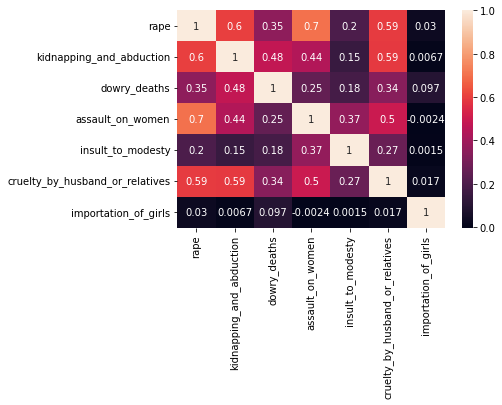

In [105]:
datac=data.drop(['sr_no','state_ut','district','year'],axis=1)
correlation=datac.corr()
sns.heatmap(correlation,annot=True)

## From correlation heatmap, it can be observed that for various districts as cases of one type of violence goes up, it is highly likely that other forms will also go up.

In [134]:
Rape=data['rape'].sum()
Kidnap_abduction=data['kidnapping_and_abduction'].sum()
Dowry_deaths=data['dowry_deaths'].sum()
Assault=data['assault_on_women'].sum()
Insult=data['insult_to_modesty'].sum()
Domestic_cruelty=data['cruelty_by_husband_or_relatives'].sum()
Importation=data['importation_of_girls'].sum()

In [135]:
Rape, Kidnap_abduction, Dowry_deaths, Assault, Insult, Domestic_cruelty, Importation

(309579, 373099, 107740, 606129, 146378, 1116944, 936)

In [136]:
ways= ["Rape", "Kidnap", "Dowry","Assault","Insult","Cruelty","Importation"]
Sumofcases=[Rape,Kidnap_abduction,Dowry_deaths,Assault,Insult,Domestic_cruelty,Importation]

### Comparing count of incidences of various forms of violence against women from 2001-2014

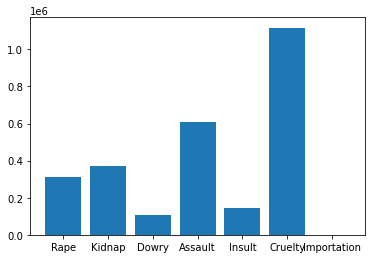

In [109]:
plot1=plt.bar(ways,Sumofcases,width=.8)


## Over a million cases of cruelty and half million cases of assault have been reported in just 14 years.

### Comparing number of reported rape cases by year

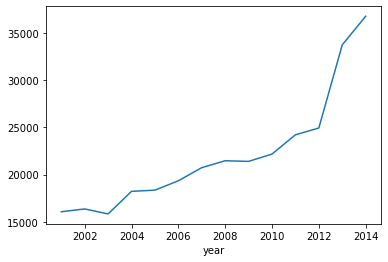

In [110]:
df2=data.groupby('year')['rape'].sum().plot(kind="line")

## Number of rape cases have shown an increasing trend over the years.

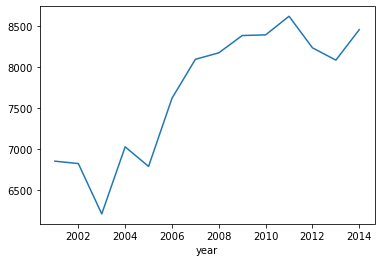

In [111]:
df3=data.groupby('year')['dowry_deaths'].sum().plot(kind="line")

## Number of dowry deaths, there is no decline in number of dowry deaths.

In [112]:
df= data[data.year == 2014]

In [113]:
dfs= df.sort_values(by = "rape", axis = 0)

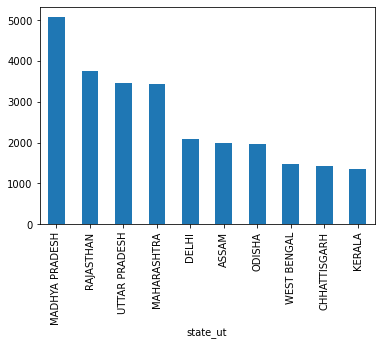

In [114]:
df2=dfs.groupby('state_ut')['rape'].sum().nlargest(10).plot(kind="bar")


## Top 10 states with most number of rapes in 2014

In [115]:
df4=df.loc[data['state_ut'] == "MADHYA PRADESH"]

In [116]:
df4.head()


,sr_no,state_ut,district,year,rape,kidnapping_and_abduction,dowry_deaths,assault_on_women,insult_to_modesty,cruelty_by_husband_or_relatives,importation_of_girls
9721,349,MADHYA PRADESH,AGAR,2014,28,12,2,56,8,44,0
9722,350,MADHYA PRADESH,ALIRAJPUR,2014,17,15,0,15,0,10,0
9723,351,MADHYA PRADESH,ANUPPUR,2014,70,83,7,121,0,114,0
9724,352,MADHYA PRADESH,ASHOK NAGAR,2014,76,38,12,171,1,82,0
9725,353,MADHYA PRADESH,BALAGHAT,2014,131,155,12,178,3,107,0


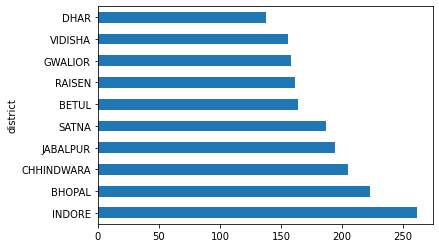

In [117]:
df5=df4.groupby('district')['rape'].sum().nlargest(10).plot(kind="barh")

## Top districts in Madhya Pradesh that reported high rape cases.

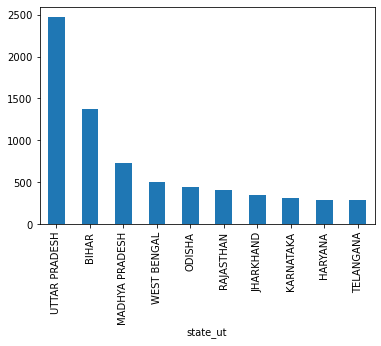

In [120]:
df3=dfs.groupby('state_ut')['dowry_deaths'].sum().nlargest(10).plot(kind="bar")


## Top 10 states with maximum dowry deaths. Bihar and Uttar Pradesh have reported very high numbers.

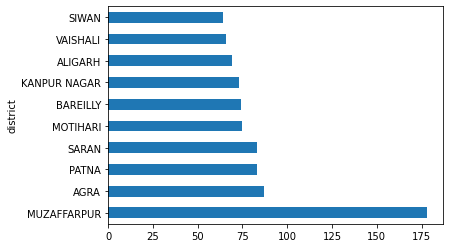

In [119]:
state_list = ['BIHAR','UTTAR PRADESH']
filtered_df = df[df['state_ut'].isin(state_list)]
df6=filtered_df.groupby('district')['dowry_deaths'].sum().nlargest(10).plot(kind="barh")

## Top 10 districts in Bihar and Uttar Pradesh that have unusually high rate of dowry deaths.

In [123]:
total_acts=data["rape"]+data["kidnapping_and_abduction"]+data["dowry_deaths"]+data["assault_on_women"]+data["insult_to_modesty"]+data["cruelty_by_husband_or_relatives"]+data["importation_of_girls"]

In [124]:
data['total_cases']=total_acts

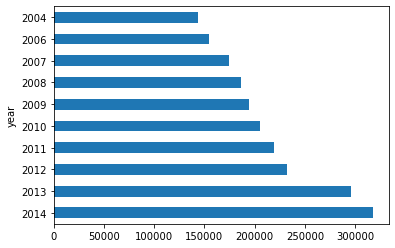

In [125]:
df7=data.groupby('year')['total_cases'].sum().nlargest(10).plot(kind="barh")

## Over the years, cases have only risen despite improvements in literacy rates and policies introduced by government.

### Summary of the data

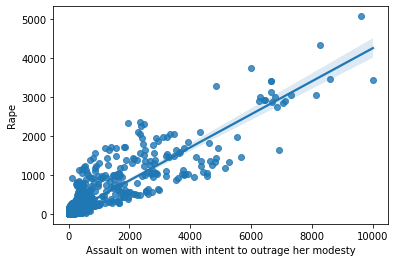

In [ ]:
sns.regplot(x='Assault on women with intent to outrage her modesty', y='Rape', data=data)

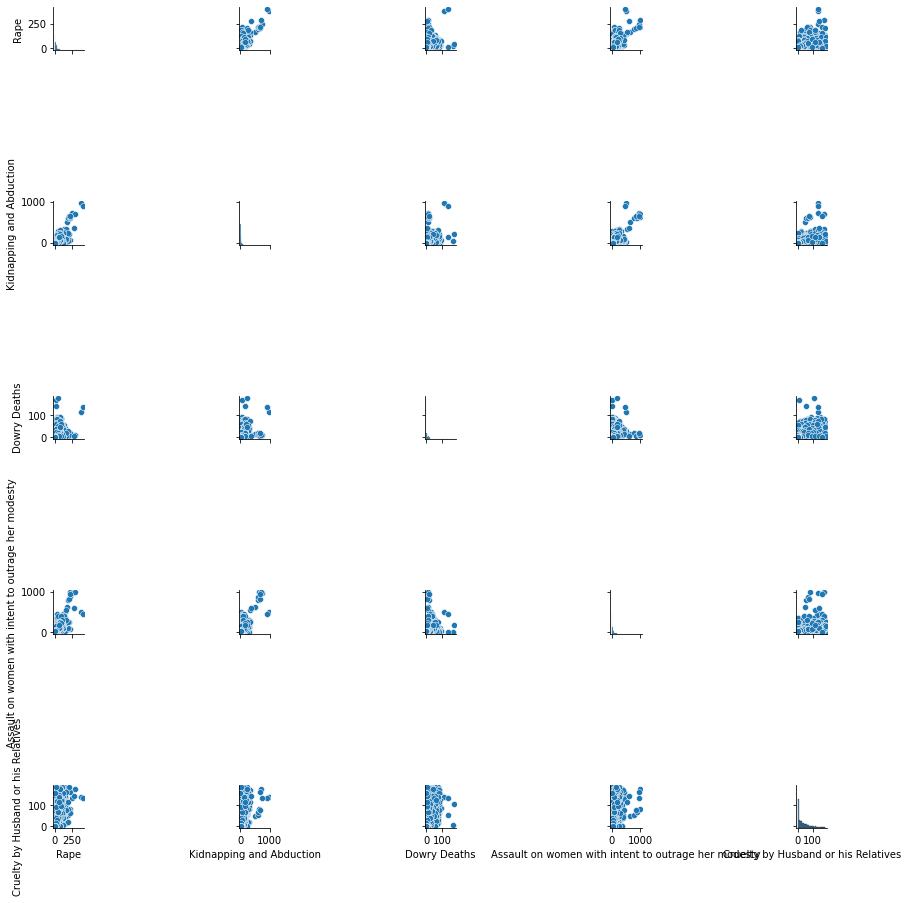

In [ ]:
# correlation between variables without outliers
sns.pairplot(dt)
plt.show()

In [ ]:
data['Importation of Girls'].count()

10677

### Count plot

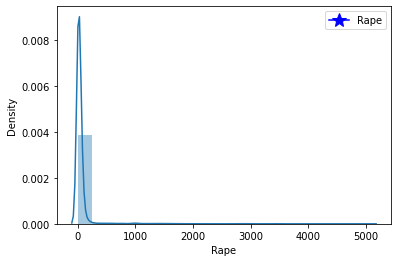

In [ ]:
# histogram and Probability Density Function(PDF) of spei
import matplotlib.lines as mlines


sns.distplot(data.Rape, bins=20)
blue_line = mlines.Line2D([], [], color='blue', marker='*',
                          markersize=15, label='Rape')
plt.legend(handles=[blue_line])
# plt.legend()
plt.show()

In [ ]:
import plotly.express as px
